# **Project for PFDA - Bank Transaction Dataset for Fraud Detection**
___

![Bank Transactions](images/bank%20transactions.jpg)

## **Dataset Overview:**

This notebook contains my analysis of a dataset of bank transactions. 

### **Dataset Details:**
- **Source:** [Bank Transactions for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data)
- **Number of Records:** XXXX
- **Number of Features:** XXXX - full details of features can be found in the README.md file. 

### **Objectives:**
1. Analyse the dataset as a whole, identifying trends and patterns across different features, including: 
    - **Age Groups**: Examining transaction behvaiours based on customer age. 
    - **Occupations**: Identifying trends tied to professions. 
    - **Times of Day**: Exploring transaction activity across time intervals. 
    - **Other Features:** Investigating patterns in device usage, account balances, and login attempts. 
2. Develop hypothese to identify characteristics of potentially fraudulent transactions through exploratory analysis. 
3. Use machine learning to investigate patterns and attempt to predict potentially fraudueltn transactions, even without explicit fraud labels. 
4. Present findings in a structured manner, incorporating visualisations, statistical insights, and key takeaways. 

**Author: Brianne McGrath**

___


## **Imports**
___

In [70]:
#import necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## **Loading Data & Initial Inspection**
___

Load the Bank Transaction dataset.

In [71]:
#loading dataset
df = pd.read_csv('data/bank_transactions_data_2.csv')

In [72]:
#reviewing first few rows of dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [73]:
#checking a random sample of dataset
df.sample(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1166,TX001167,AC00175,309.77,2023-05-08 16:31:56,Credit,San Antonio,D000384,40.10.25.102,M010,Online,67,Retired,137,1,4378.14,2024-11-04 08:06:24
1489,TX001490,AC00368,35.46,2023-07-18 16:38:11,Debit,Indianapolis,D000674,83.80.89.29,M073,ATM,67,Doctor,164,1,5692.31,2024-11-04 08:10:12
492,TX000493,AC00213,66.58,2023-12-04 17:06:43,Debit,Raleigh,D000419,20.147.6.179,M040,Branch,23,Student,79,1,1636.32,2024-11-04 08:08:48
1432,TX001433,AC00357,195.54,2023-07-17 16:05:23,Debit,Omaha,D000144,161.195.172.148,M039,Online,60,Retired,255,1,2794.66,2024-11-04 08:09:01
360,TX000361,AC00397,466.85,2023-07-17 16:57:14,Debit,Austin,D000016,136.104.90.223,M007,Branch,56,Retired,165,1,5422.53,2024-11-04 08:09:35


In [74]:
df.shape

(2512, 16)

In [75]:
#displaying information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [76]:
#changing data type from object to datetime for TransactionDate and PreviousTransactionDate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')

In [77]:
#checking changes have been made 
df.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

In [78]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX000001,AC00362,NaN,NaN,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


In [79]:
#checking unique values
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [80]:
# checking for null values 
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [81]:
#checking for missing values 
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [82]:
#checking for duplicated values 
df.duplicated().sum()

0

## **Data Analysis and Visualisation:**
___

### **Distribution of Transaction Amounts:**
We begin by examing the distribution of transaction amounts to understand how customers typically spend. This can help identify patterns like unusually high or low transactions, which could indicate anomalies. 

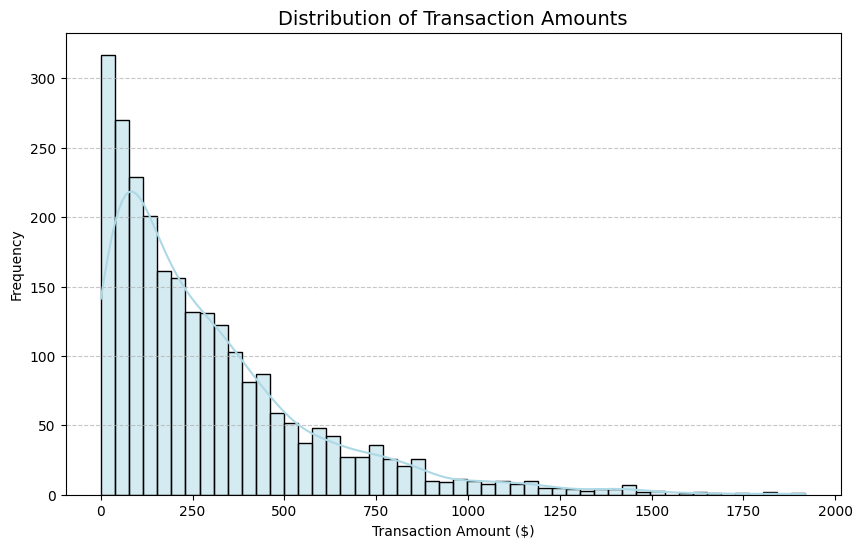

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='lightblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()


- **Skewed Distribution:** The graph shows a **right-skewed distribution**, where most transaction amounts are small (e.g., under $250). This seems typical for a real-world situation, as smaller transactions are generally more common than larger ones. 
- **Low Frequency of Large Transactions:** Transactions above $1,000 are much less frequent, suggesting that high-value transactions are rare. 
- **Potential Outliers:** While the plot doesn't show specific points, the tail of the distribution indicates potential outliers (e.g., transactions closer to $2,000 - although this is hard to read). We will analyse these further to check if they are genuine or fraudulent. 

### **Transaction Types:**

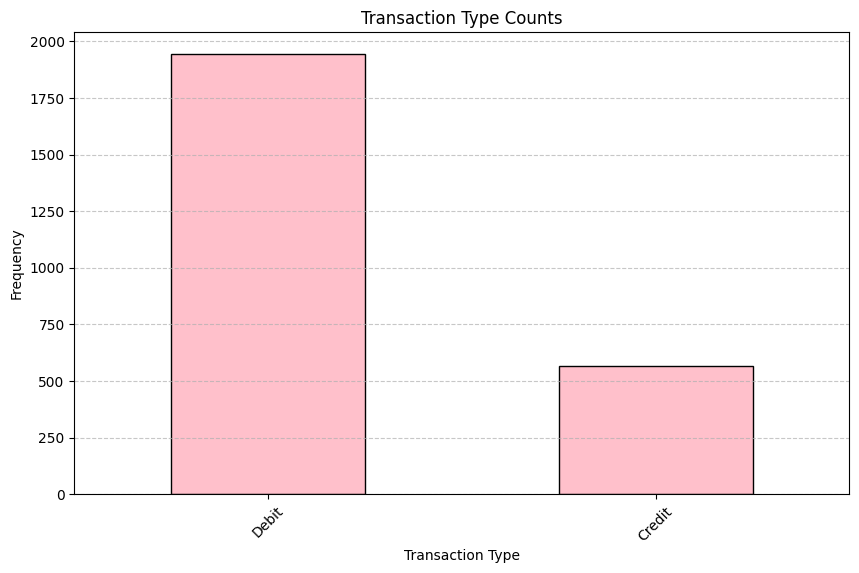

In [84]:

transaction_type_counts = df['TransactionType'].value_counts()
transaction_type_counts.plot(kind='bar', figsize=(10, 6), color='pink', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Transaction Type Counts')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

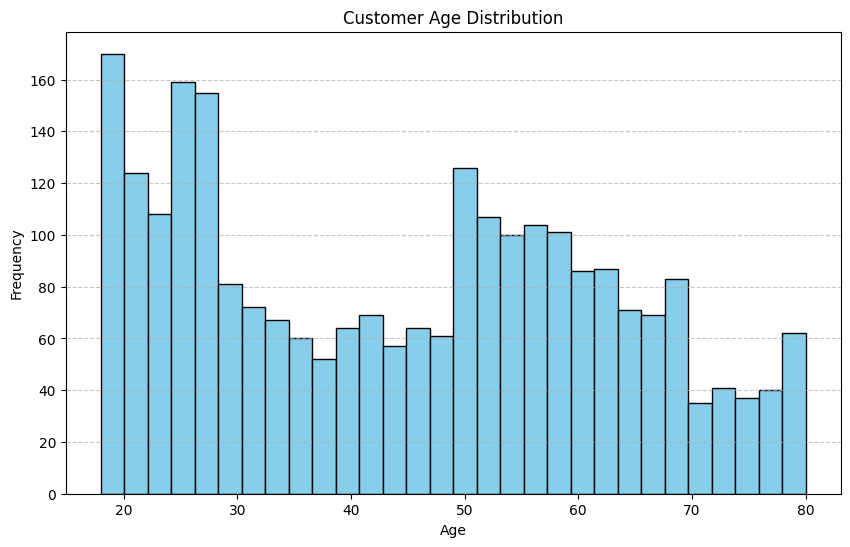

In [85]:
plt.figure(figsize=(10, 6))
df['CustomerAge'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

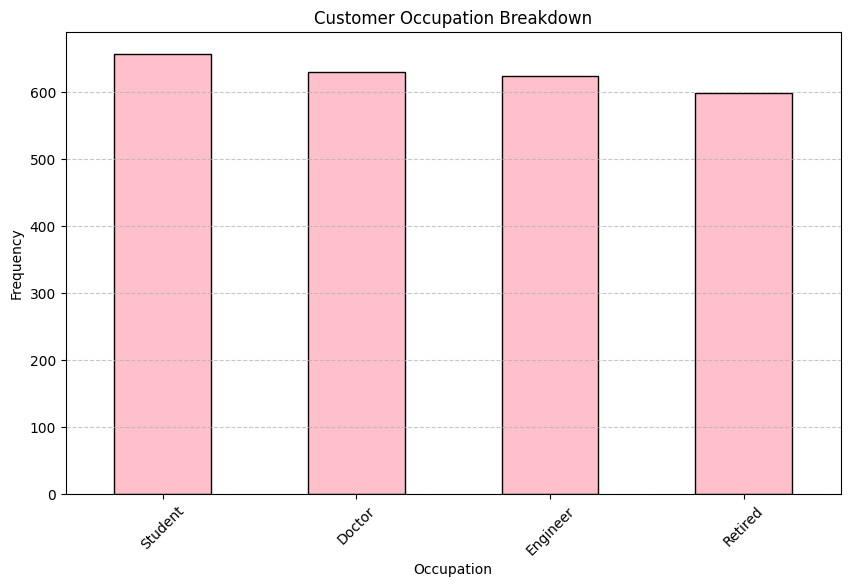

In [86]:
occupation_counts = df['CustomerOccupation'].value_counts()
occupation_counts.plot(kind='bar', figsize=(10, 6), color='pink', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Customer Occupation Breakdown')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

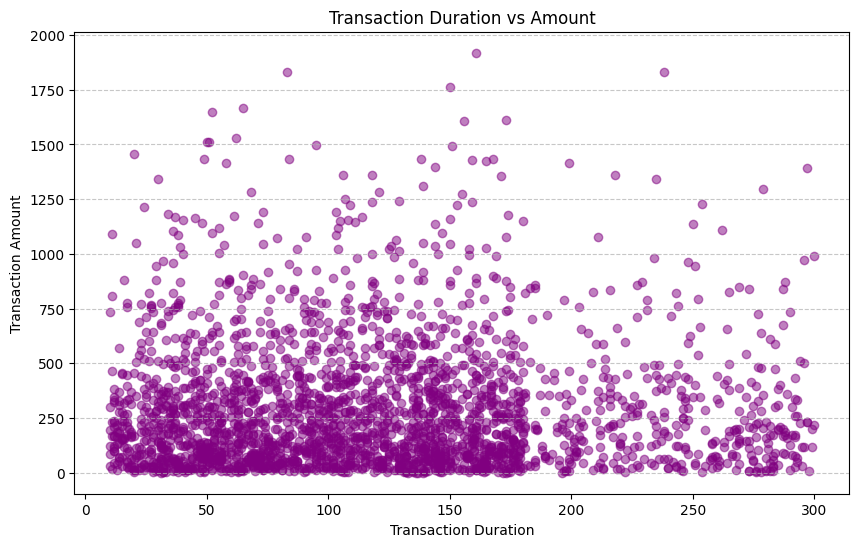

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionDuration'], df['TransactionAmount'], alpha=0.5, color='purple')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Transaction Duration vs Amount')
plt.xlabel('Transaction Duration')
plt.ylabel('Transaction Amount')
plt.show()

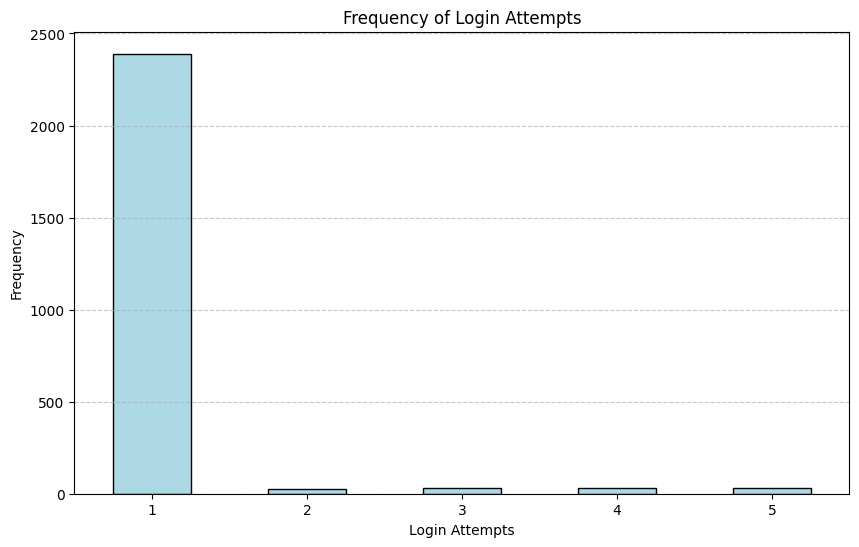

In [88]:
plt.figure(figsize=(10, 6))
df['LoginAttempts'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Frequency of Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

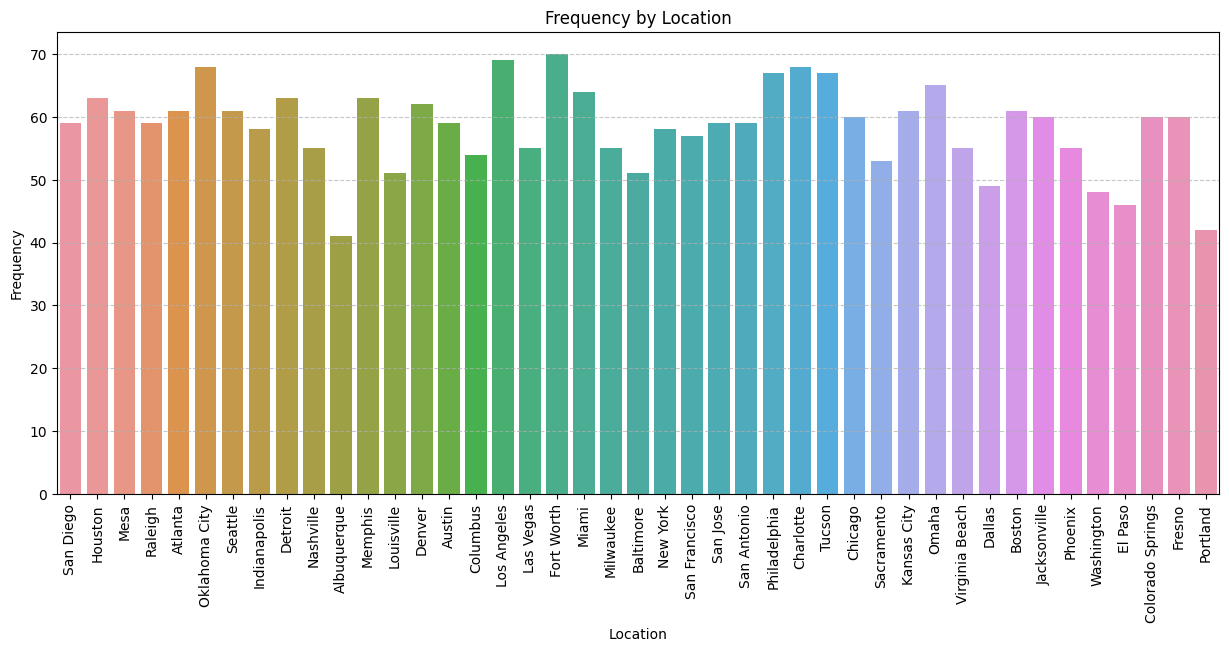

In [89]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Location')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Frequency by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## **Statistical Analysis:** 

### **Descriptive Statistics:**

In [90]:
# numerical columns 
numerical_col = ['TransactionAmount', 'AccountBalance', 'LoginAttempts', 'TransactionDuration']
df[numerical_col].describe()

,TransactionAmount,AccountBalance,LoginAttempts,TransactionDuration
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,5114.302966,1.124602,119.643312
std,291.946243,3900.942499,0.602662,69.963757
min,0.260000,101.250000,1.000000,10.000000
25%,81.885000,1504.370000,1.000000,63.000000
50%,211.140000,4735.510000,1.000000,112.500000
75%,414.527500,7678.820000,1.000000,161.000000
max,1919.110000,14977.990000,5.000000,300.000000


### **Group Comparison ($t$-Test for Debit vs Credit)**

In [91]:
# seperate data into two groups: Debit and Credit 
debit = df[df['TransactionType'] == 'Debit']['TransactionAmount']
credit = df[df['TransactionType'] == 'Credit']['TransactionAmount']

# perform a t-test
t_stat, p_value = ttest_ind(debit, credit, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# interpretation 
if p_value < 0.05: 
    print("Significant difference between Debit and Credit transaction amount.")
else: 
    print("No signifcant difference between Debit and Credit transaction amount.")

T-Statistic: -0.8304060943767217, P-Value: 0.4065222993565707
No signifcant difference between Debit and Credit transaction amount.


### **Correlation between Numerical Columns**

In [92]:
# correlation analysis 
correlation_matrix = df[numerical_col].corr()
print(correlation_matrix)

                     TransactionAmount  AccountBalance  LoginAttempts  \
TransactionAmount             1.000000       -0.025165      -0.008445   
AccountBalance               -0.025165        1.000000       0.014999   
LoginAttempts                -0.008445        0.014999       1.000000   
TransactionDuration           0.004359        0.005577       0.032639   

                     TransactionDuration  
TransactionAmount               0.004359  
AccountBalance                  0.005577  
LoginAttempts                   0.032639  
TransactionDuration             1.000000  


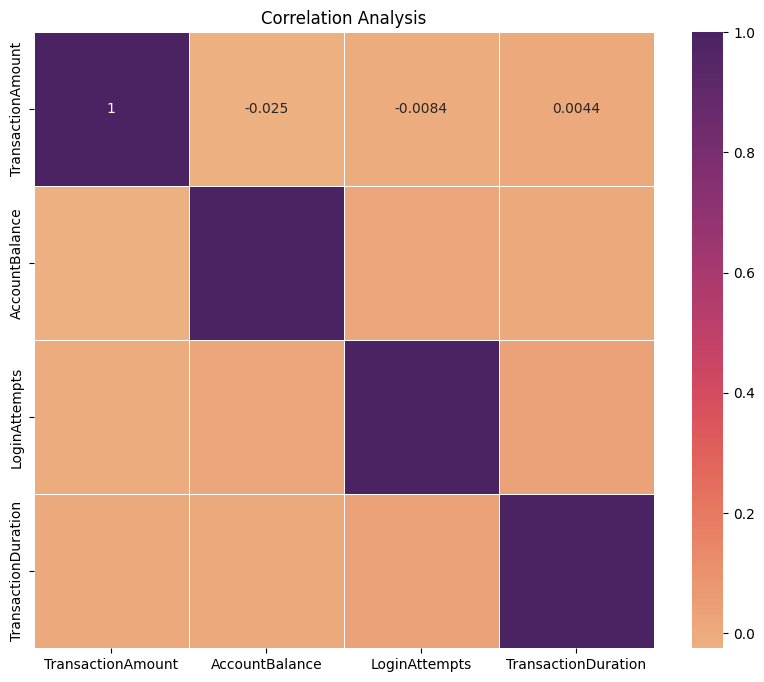

In [93]:
# visualise correlations with heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

#### **Interpretation:**
1. **TransactionAmount**:
Almost no correlation with `AccountBalance` (-0.025) and `LoginAttempts` (-0.008).
Very slight positive correlation with `TransactionDuration` (0.004), but this is negligible.

2. **AccountBalance**:
Minimal correlations with all variables:
Slight positive correlation with LoginAttempts (0.015) and `TransactionDuration` (0.006).

3. **LoginAttempts**:
Weak positive correlation with `TransactionDuration` (0.033).
No meaningful relationships with `TransactionAmount` or `AccountBalance`.

4. **TransactionDuration**:
No significant correlations with any variable. These low correlation values suggest that the selected numerical features are mostly **independent** of each other.

*** Might have more luck with categorical variables? 

## **Categorical Analysis:**

**Potential Questions**
- Are there variations in loginattempts across different channels/customer ages? 
- Do locations/customer occuptation influence average transaction amount? 

### **Does the Transaction Type impact Transaction Amount?**

In [94]:
# group data by TransactionType and calculate summary statistics
stats_by_type = df.groupby('TransactionType')['TransactionAmount'].describe()
stats_by_type


,count,mean,std,min,25%,50%,75%,max
TransactionType,,,,,,,,
Credit,568.0,306.501004,290.027618,2.03,80.0125,223.36,425.220,1831.02
Debit,1944.0,294.991255,292.527512,0.26,83.1375,205.14,407.785,1919.11


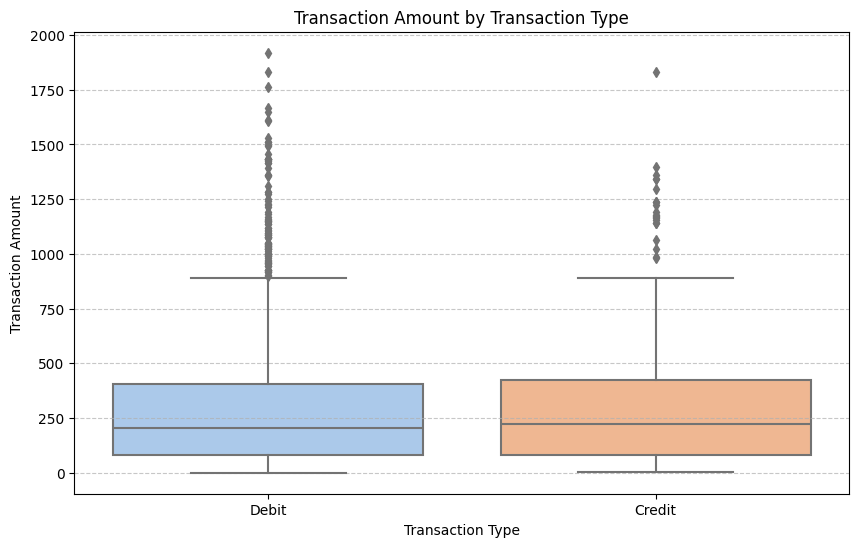

In [95]:
# transaction amount by transaction type 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount', palette='pastel')
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [96]:
# separate transaction amounts by type
debit_amounts = df[df['TransactionType'] == 'Debit']['TransactionAmount']
credit_amounts = df[df['TransactionType'] == 'Credit']['TransactionAmount']

# perform a t-test
t_stat, p_value = ttest_ind(debit_amounts, credit_amounts, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.8304060943767217, P-value: 0.4065222993565707


**Interpretation of Results:**
- **$t$-statistic:** -0.83 suggest that the difference in means between the debit vs credit is relatively small and not strongly directional. 
- **p-value:** 0.41 is significantly greater than 0.5, which means there is no statisticall significant differnce in the `TransactionAmount` between the two transaction type. 

Based on this analysis, we cannot conclude that `TransactionType` impacts `TransactionAmount`. While the means of `TransactionAmounts` for debit and credit transactions may differ slightly, this difference is likely down to random chance. 

___

___ 

## **References:**

### **Visualisation:**
- https://seaborn.pydata.org/generated/seaborn.kdeplot.html (kdeplot - Kernel Density Plot for Login Attempts)
- https://www.statology.org/pandas-value_counts-sort/ (Sorting results of value_counts(). Used for visualisation in  Frequency of Login Attempts)
